
1. Calculate Daily Average
2. Calculate Monthly Trends
3. Calculate Yearly Trends
4. Aggregate Data by Location
5. Plot Temperature Trends Over Time
6. Plot Temperature Distribution
7. Plot Temperature by Location
8. Plot Weather Conditions
9. Plot Monthly Average Temperature
10. Plot Wind Speed vs Temperature
11. Plot Facet Grid for Temperature by Location
12. Calculate Temperature Anomalies
13. View Dataset
14. Save and Exit


Enter your choice:  10


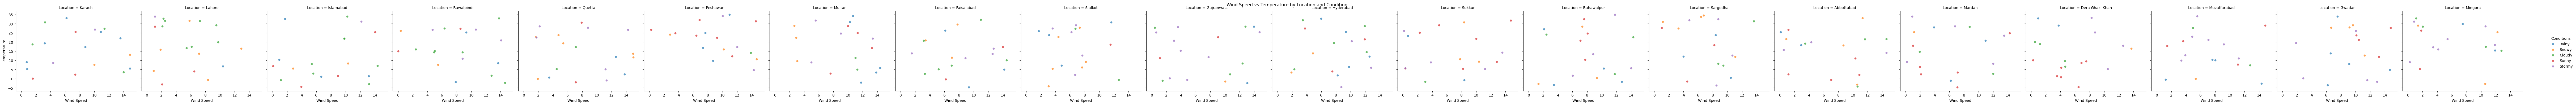


1. Calculate Daily Average
2. Calculate Monthly Trends
3. Calculate Yearly Trends
4. Aggregate Data by Location
5. Plot Temperature Trends Over Time
6. Plot Temperature Distribution
7. Plot Temperature by Location
8. Plot Weather Conditions
9. Plot Monthly Average Temperature
10. Plot Wind Speed vs Temperature
11. Plot Facet Grid for Temperature by Location
12. Calculate Temperature Anomalies
13. View Dataset
14. Save and Exit


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load and clean data
def load_data(file_path):
    weather_data = pd.read_csv(file_path)
    weather_data.fillna(0, inplace=True)  # Replace missing values with 0
    return weather_data

# Step 2: Data Cleaning - Convert Date to datetime and set it as index
def clean_data(weather_data):
    weather_data['Date'] = pd.to_datetime(weather_data['Date'], errors='coerce')
    weather_data.set_index('Date', inplace=True)
    return weather_data

# Step 3: Check for missing values
def check_missing_values(weather_data):
    return weather_data.isnull().sum()

# Step 4: Calculate Daily Average
def calculate_daily_average(weather_data):
    daily_avg = weather_data.groupby('Date')['Temperature'].mean()
    return daily_avg

# Step 5: Calculate Monthly Averages

def calculate_monthly_averages(weather_data):
    # Select only numeric columns for resampling and calculating mean
    numeric_data = weather_data.select_dtypes(include=[np.number])
    monthly_averages = numeric_data.resample('ME').mean()
    return monthly_averages

# Step 6: Calculate Yearly Averages
def calculate_yearly_averages(weather_data):
    numeric_data = weather_data.select_dtypes(include=[np.number])
    yearly_averages = numeric_data.resample('YE').mean()
    return yearly_averages

# Step 7: Aggregate data by Location
def aggregate_by_location(weather_data):
    location_stats = weather_data.groupby('Location').agg({
        'Temperature': ['min', 'max', 'mean'],
        'Precipitation': ['min', 'max', 'mean'],
        'Humidity': ['min', 'max', 'mean'],
        'Wind Speed': ['min', 'max', 'mean']
    })
    return location_stats

# Step 8: Plot Temperature Trends Over Time
def plot_temperature_trends(weather_data):
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=weather_data, x=weather_data.index, y='Temperature')
    plt.title('Temperature Trends Over Time')
    plt.xlabel('Date')
    plt.ylabel('Temperature (°C)')
    plt.show()

# Step 9: Plot Temperature Distribution
def plot_temperature_distribution(weather_data):
    plt.figure(figsize=(10, 6))
    weather_data['Temperature'].hist(bins=20)
    plt.title('Temperature Distribution')
    plt.xlabel('Temperature (°C)')
    plt.ylabel('Frequency')
    plt.show()

# Step 10: Boxplot for Temperature Variations by Location
def plot_temperature_by_location(weather_data):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=weather_data, x='Location', y='Temperature')
    plt.title('Temperature Variations by Location')
    plt.xlabel('Location')
    plt.ylabel('Temperature (°C)')
    plt.show()

# Step 11: Pie Chart for Weather Conditions Distribution
def plot_weather_conditions(weather_data):
    condition_counts = weather_data['Conditions'].value_counts()
    plt.figure(figsize=(8, 8))
    condition_counts.plot.pie(autopct='%1.1f%%')
    plt.title('Weather Conditions Distribution')
    plt.ylabel('')
    plt.show()

# Step 12: Area Chart for Monthly Average Temperature
def plot_monthly_avg_temperature(monthly_averages):
    plt.figure(figsize=(12, 6))
    monthly_averages['Temperature'].plot(kind='area', alpha=0.4)
    plt.title('Monthly Average Temperature')
    plt.xlabel('Month')
    plt.ylabel('Temperature (°C)')
    plt.show()

# Step 13: Wind Speed vs Temperature (Wind Rose Alternative using FacetGrid)
def plot_wind_speed_vs_temperature(weather_data):
    g = sns.FacetGrid(weather_data, col="Location", hue="Conditions", height=4, aspect=1.2)
    g.map(sns.scatterplot, "Wind Speed", "Temperature", alpha=.7)
    g.add_legend()
    plt.subplots_adjust(top=0.9)
    g.fig.suptitle('Wind Speed vs Temperature by Location and Condition')
    plt.show()

# Step 14: FacetGrid for Temperature Trends Over Time by Location
def plot_facet_grid_temperature(weather_data):
    # Reset index to access 'Date' column for plotting
    weather_data_reset = weather_data.reset_index()
    g = sns.FacetGrid(weather_data_reset, col="Location", col_wrap=2, height=4, aspect=1.5)  # col_wrap=2 to show 2 plots per row
    g.map(sns.lineplot, "Date", "Temperature")
    g.set_axis_labels("Date", "Temperature (°C)")
    plt.subplots_adjust(top=0.9)
    g.fig.suptitle('Temperature Trends Over Time by Location')
    plt.show()


# Step 15: Calculate Temperature Anomalies (Deviations)
def calculate_temperature_anomalies(monthly_averages):
    monthly_averages['Temperature_Anomaly'] = monthly_averages['Temperature'] - monthly_averages['Temperature'].mean()
    return monthly_averages

# Step 16: Display the dataset
def display_dataset(weather_data):
    print(weather_data.head())  # Show first 5 rows of the dataset

# Main function to run the analysis tool
def weather_analysis_tool():
    file_path = "F:/New folder/weather_data_with_location_2023(2).csv"  # Update with your file path
    weather_data = load_data(file_path)
    
    # Clean data
    weather_data = clean_data(weather_data)
    
    while True:
        print("\n1. Calculate Daily Average")
        print("2. Calculate Monthly Trends")
        print("3. Calculate Yearly Trends")
        print("4. Aggregate Data by Location")
        print("5. Plot Temperature Trends Over Time")
        print("6. Plot Temperature Distribution")
        print("7. Plot Temperature by Location")
        print("8. Plot Weather Conditions")
        print("9. Plot Monthly Average Temperature")
        print("10. Plot Wind Speed vs Temperature")
        print("11. Plot Facet Grid for Temperature by Location")
        print("12. Calculate Temperature Anomalies")
        print("13. View Dataset")
        print("14. Save and Exit")
        
        choice = input("Enter your choice: ")
        
        if choice == "1":
            daily_avg = calculate_daily_average(weather_data)
            print(daily_avg)
        
        elif choice == "2":
            monthly_averages = calculate_monthly_averages(weather_data)
            print(monthly_averages)
        
        elif choice == "3":
            yearly_averages = calculate_yearly_averages(weather_data)
            print(yearly_averages)
        
        elif choice == "4":
            location_stats = aggregate_by_location(weather_data)
            print(location_stats)
        
        elif choice == "5":
            plot_temperature_trends(weather_data)
        
        elif choice == "6":
            plot_temperature_distribution(weather_data)
        
        elif choice == "7":
            plot_temperature_by_location(weather_data)
        
        elif choice == "8":
            plot_weather_conditions(weather_data)
        
        elif choice == "9":
            monthly_averages = calculate_monthly_averages(weather_data)
            plot_monthly_avg_temperature(monthly_averages)
        
        elif choice == "10":
            plot_wind_speed_vs_temperature(weather_data)
        
        elif choice == "11":
            plot_facet_grid_temperature(weather_data)
        
        elif choice == "12":
            monthly_averages = calculate_monthly_averages(weather_data)
            monthly_averages = calculate_temperature_anomalies(monthly_averages)
            print(monthly_averages['Temperature_Anomaly'])
        
        elif choice == "13":
            display_dataset(weather_data)
        
        elif choice == "14":
            weather_data.to_csv("modified_weather_data.csv", index=False)
            print("Data saved successfully.")
            break
        
        else:
            print("Invalid choice. Try again.")

# Run the analysis tool
weather_analysis_tool()
